In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [35]:
N_ep = 10 # Number of episodes
prop_test = 0.2 # Proportion of test set
shuffle = True # Shuffle data every episode
episode_rec = int(N_ep/10)

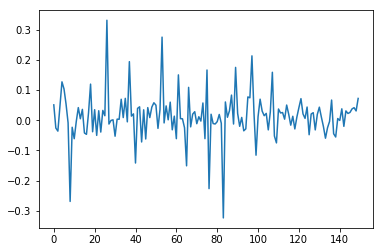

tensor([ 0.5567,  0.9599,  0.9966,  3.4067,  0.0870,  0.6931])


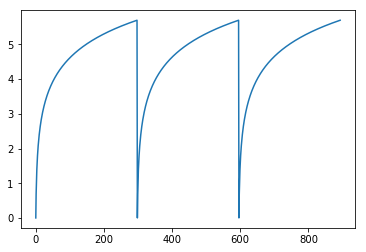

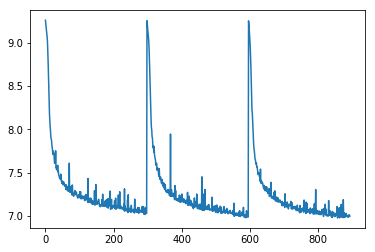

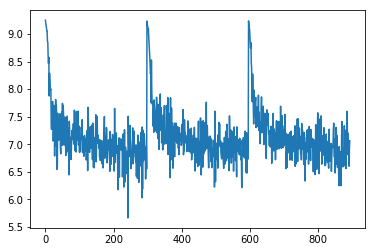

In [36]:
# Load data
f = open('dqn_models/replay_memory_2','rb')
# f = open('replay_memory_0_500','rb')
dataset = pickle.load(f)

# Data size
num_data = len(dataset)
# Features
X = torch.cat([x[0] for x in dataset]).float()
# Labels
y = torch.from_numpy(np.array([x[1] for x in dataset])).float()

input_dim = X.size(1)

X = X[:150, :]
y = y[:150]
# Initial shuffle
if shuffle:
    permutation = torch.randperm(150)
#     X = X[permutation][:150, :]
#     y = y[permutation]
#     y = y[:150]
    X = X[permutation]
    y = y[permutation]
    
plt.plot(y)
plt.show()

print (dataset[1][0][0])
time = torch.from_numpy(np.array([x[0][0][-1] for x in dataset])).float()
plt.plot(time)
plt.show()



val_loss = torch.from_numpy(np.array([x[2] for x in dataset])).float()
plt.plot(val_loss)
plt.show()

train_loss= torch.from_numpy(np.array([x[4] for x in dataset])).float()
plt.plot(train_loss)
plt.show()    
    
    
num_train = int(150*(1-prop_test))
# num_train = 100
X_train = X[:num_train]
y_train = y[:num_train]
X_test = X[num_train:]
y_test = y[num_train:]

# Normalize
y_train = y_train/abs(y_train).max()
y_test = y_test/abs(y_test).max()

In [37]:
# Network
class net(nn.Module):
    def __init__(self, input_dim=6, output_dim=1, hidden_size=6, hidden_dropout_prob=0):
        super(net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size) # input layer -> hidden layer
        self.fc2 = nn.Linear(hidden_size, output_dim) # hidden layer -> output layer
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = net(input_dim=input_dim)

In [38]:
sample_num=10
print(model(X[sample_num]))
print(y[sample_num])
print(model(X[sample_num])-y[sample_num])

tensor([-0.5419])
tensor(1.00000e-02 *
       -6.1177)
tensor([-0.4807])


In [39]:
optimizer = optim.SGD(model.parameters(),lr=0.001)

training_loss = []
test_loss = []

# Training
for i_ep in range(N_ep):
    
    if shuffle:
        permutation = torch.randperm(num_train)
        X_train = X_train[permutation]
        y_train = y_train[permutation]
        
    for i_data in range(num_train):
        features = X_train[i_data]
        y_data = y_train[i_data]
        #features = X
        #y_data = y.view(-1,1)
        
        y_pred = model(features)
        
        #loss = F.smooth_l1_loss(y_pred,y_data)
        loss = torch.mean((y_pred - y_data)**2)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Compute training & test losses and record
    y_train_pred = model(X_train)
    loss_train = torch.mean((y_train-y_train_pred)**2)
    y_test_pred = model(X_test)
    loss_test = torch.mean((y_test-y_test_pred)**2)
    training_loss.append(loss_train)
    test_loss.append(loss_test)
        
    if i_ep != 0 and (i_ep % episode_rec == 0):
        print(i_ep)

1
2
3
4
5
6
7
8
9


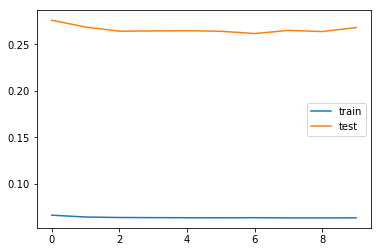

In [40]:
plt.plot(training_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
#plt.savefig('train_loss_curve.png')
plt.show()

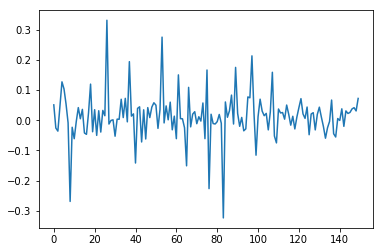

tensor(2.0781)


In [41]:
plt.plot(y)
plt.show()
print (sum(y))

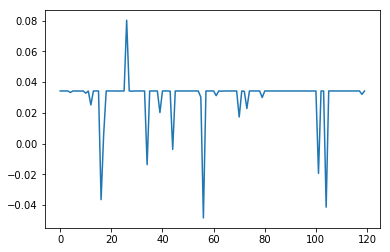

In [42]:
y_model = model(X_train).detach().numpy()
plt.plot(y_model)
plt.show()

tensor([-0.3241, -0.2694, -0.2269, -0.1512, -0.1419, -0.1159, -0.0751,
        -0.0720, -0.0621, -0.0612, -0.0611, -0.0611, -0.0595, -0.0555,
        -0.0529, -0.0522, -0.0502, -0.0480, -0.0467, -0.0447, -0.0422,
        -0.0391, -0.0381, -0.0360, -0.0349, -0.0320, -0.0319, -0.0316,
        -0.0287, -0.0285, -0.0269, -0.0257, -0.0250, -0.0248, -0.0232,
        -0.0219, -0.0210, -0.0202, -0.0200, -0.0162, -0.0125, -0.0124,
        -0.0124, -0.0114, -0.0108, -0.0100, -0.0088, -0.0086, -0.0052,
        -0.0045, -0.0042, -0.0038, -0.0026, -0.0006, -0.0006,  0.0015,
         0.0015,  0.0033,  0.0037,  0.0038,  0.0049,  0.0051,  0.0055,
         0.0058,  0.0063,  0.0089,  0.0089,  0.0095,  0.0100,  0.0102,
         0.0107,  0.0117,  0.0121,  0.0133,  0.0137,  0.0138,  0.0151,
         0.0151,  0.0193,  0.0194,  0.0200,  0.0201,  0.0203,  0.0209,
         0.0211,  0.0213,  0.0226,  0.0229,  0.0229,  0.0243,  0.0243,
         0.0247,  0.0252,  0.0257,  0.0260,  0.0278,  0.0285,  0.0306,
      

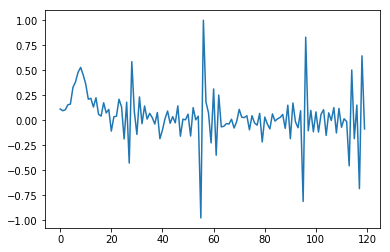

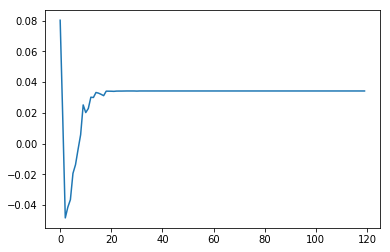

In [43]:
ordered = []

X_orig = torch.cat([x[0] for x in dataset]).float()

t_list = X_train[:,-1].numpy()
t_list = t_list[:120]

l_list =  X_train[:,-2].numpy()
print(y[np.argsort(y)])
# t_list[np.argsort(t_list)]
y_sort = y_train[np.argsort(t_list)]

plt.plot(y_sort)
plt.show()


y_model = model(X_train).detach().numpy()
y_model = y_model[np.argsort(t_list)]
plt.plot(y_model)
plt.show()

# plt.plot(y_train)
# plt.show()

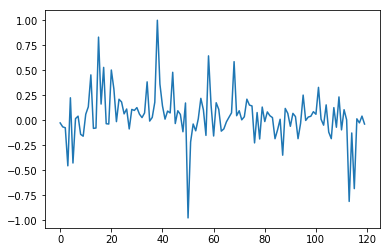

In [44]:

plt.plot(y_train)
plt.show()